**/юб/**  
https://youtu.be/B03CrtpYDi4  


# План
1. Напоминание: переобучение, регуляризация и кросс-валидация
2. Pipeline решения ML задачи
3. Подбор гиперпараметров и ансамблирование моделей на примере размеченных данных

# Переобучение и методы борьбы с ним
Переобучение --- это одна из главных проблем, с которыми сталкиваются модели машинного обучения. Эффект переобучения состоит в том, что модель, подстраиваясь под обучающую выборку, "обращает внимание" на закономерности в выборке, которые не проявляются в общем случае и имеют характер совпадения. 

Переобучение проявляется тем больше, чем больше степеней свободы имеет модель. 
### Примеры:
* Решающее дерево со слишком большой глубиной может идеально подстроиться под обучающую выборку. Параметры решающего дерева --- это решающие правила во всех вершинах (всего $\sim 2^n$ решающих правил в дереве глубины $n$).

* Алгоритм $k$ ближайших соседей подстраивается под обучаюущую выборку и может рассматриваться как эталонный пример переобучения: любой локальный шум в данных приведёт к ошибке. Параметрами Knn являются **все элементы обучающей выборки**.

* Линейный алгоритм, построенный для выборки слишком маленького размера со слишком большим количеством признаков неизбежно переобучится под обучающую выборку.

Во всех примерах мы видим, что при слишком большой сложности модели по сравнению с количеством элементов в обучающей выборке переобучение имеет место. Строго говоря, **переобучение есть всегда, когда имеет место принятие решения в условии неполных данных**, то есть всегда в машинном обучении.

<img src='https://drive.google.com/uc?id=1wQQ0tMAtZVhbeQgUVdiS7kfmMw7P7NM9'/>

Чтобы нивелировать эффект переобучения, нужно поймать момент, в который качество на тестовой выборке начинает увеличиваться (уменьшаться - /юб/) с ростом сложности модели. В этот момент обучение стоит останавливать.

## Переобучение многочленов
Смоделируем переобучение сколонность к переобучению полиномиальной зависимости с ростом степени многочлена. Сгенерируем искусственные данные из линейной зависимости с шумом и восстановим зависимость с помощью многочленов степени 1, 3, 4, 7 (1 - 20 /юб/).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [6]:
# генерируем X и y для наших "выборок"
X = np.linspace(-10, 10, 20)
y = 2 * X + 3 + np.random.randn(20) * 3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

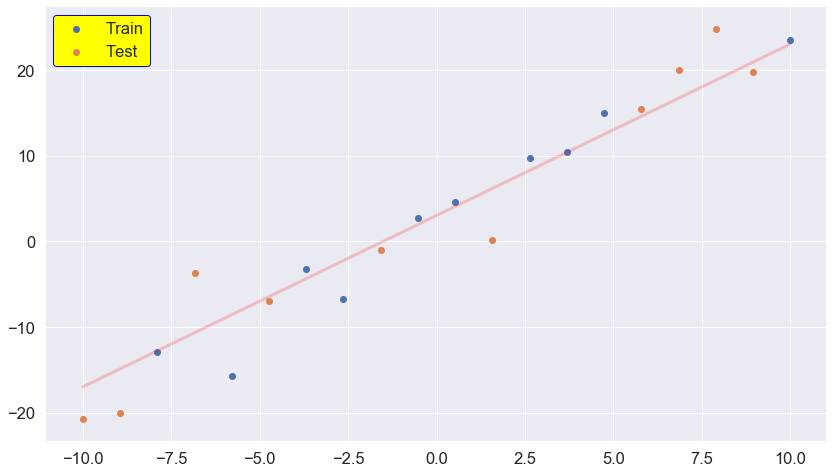

In [8]:
plt.figure(figsize=(14,8))
# набрасываем элементы на диаграмму
plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,y_test, label='Test')
plt.plot(X, 2 * X + 3, color='red', lw=3, alpha = 0.2)

# легенду оформляем
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("yellow")
legend_box.set_edgecolor("blue")

plt.show()

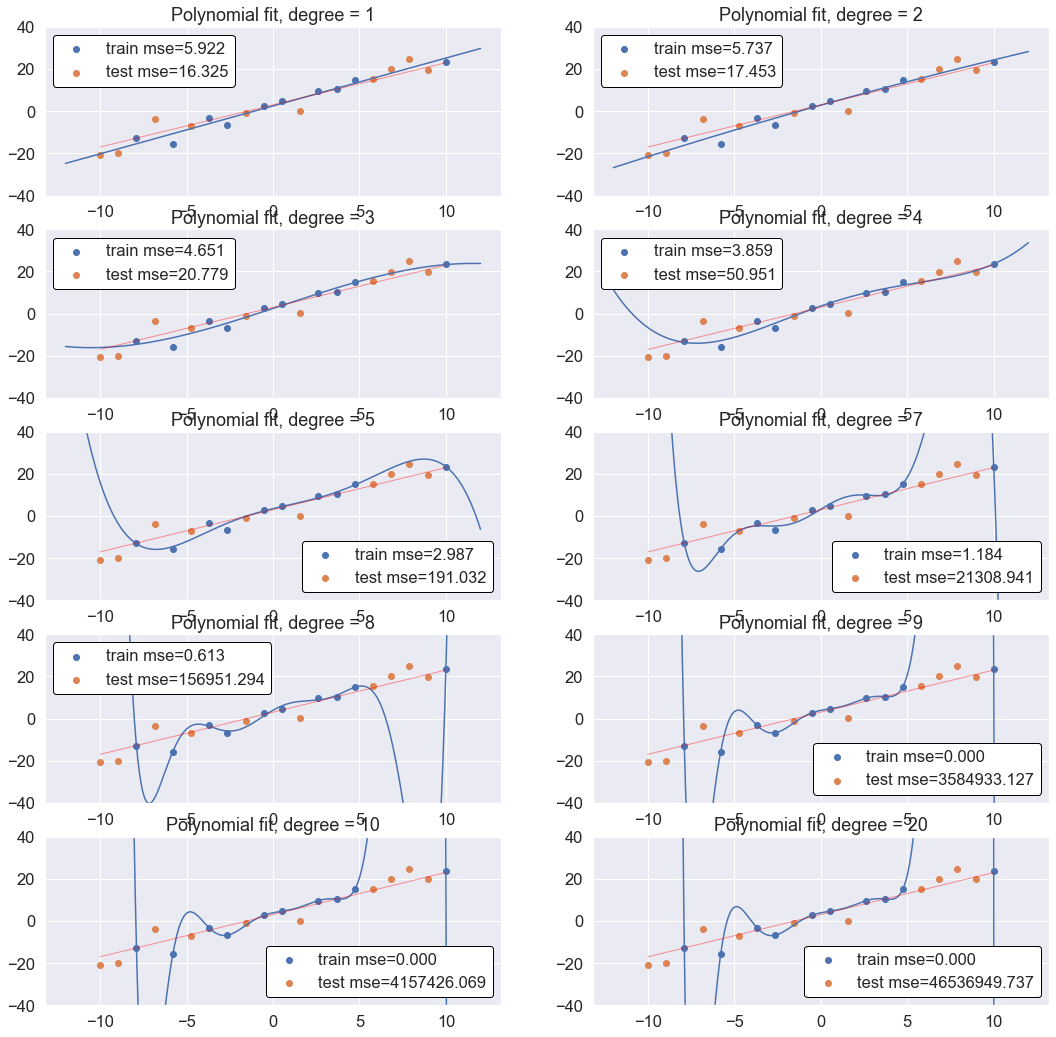

In [10]:
grid = np.linspace(-12, 12, 500)  # для построения графика полиномиальной функции

# создаем поля для графиков
fig, ax = plt.subplots(5, 2, figsize=(18,18))
ax = ax.ravel()   # ??? Return a flattened array

for i, deg in enumerate([1, 2, 3, 4, 5, 7, 8, 9, 10, 20]):
    # встроенная в нумпи полиномиальная регрессия /юб/. Обучаем модель. На выходе - коэффициенты полинома
    poly = np.polyfit(X_train, y_train, deg)
    # строим график для полинома i-ой степени и скаттерплоты исходных точек
    ax[i].set_title('Polynomial fit, degree = ' + str(deg))
    # np.polyval - вычислитель значения полинома
    # вычисляем ошибку (MSE) нашего предсказания на тренировочной выборке/. А потом и на тестовой
    ax[i].scatter(X_train,y_train, 
                  label='train mse={:.3f}'.format(mean_squared_error(y_train, np.polyval(poly, X_train))))
    ax[i].scatter(X_test,y_test, 
                  label='test mse={:.3f}'.format(mean_squared_error(y_test, np.polyval(poly, X_test))))
    ax[i].set_ylim(-40, 40)
    ax[i].plot(grid, np.polyval(poly, grid))  # линия полинома
    ax[i].plot(X, 2 * X + 3, color='red', lw=1, alpha = 0.4)  # прямая исходная
    legend_box = ax[i].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
fig.show()

/юб/ train MSE падает постоянно, а вот тестовый MSE - нет

**/юб/**
Не всегда лучший ответ - degree=1.
В полиноме 9 еще 10-ый свободный член? В 10 переменных "запомнили" 10 точек. Дальше усложнение модели ничем не помогает.  

**/юб/** Однако ниже при 100 + 100 точках, даже degree=300 не способна пройтись по всем точкам обучающей выборки. При 29 + 29 точках MSE еще достигает 0.

In [2]:
N = 200  # количество точек: обучающая выборка и тестовая
X = np.linspace(-10, 10, N)
y = 2 * X + 3 + np.random.randn(N) * 3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

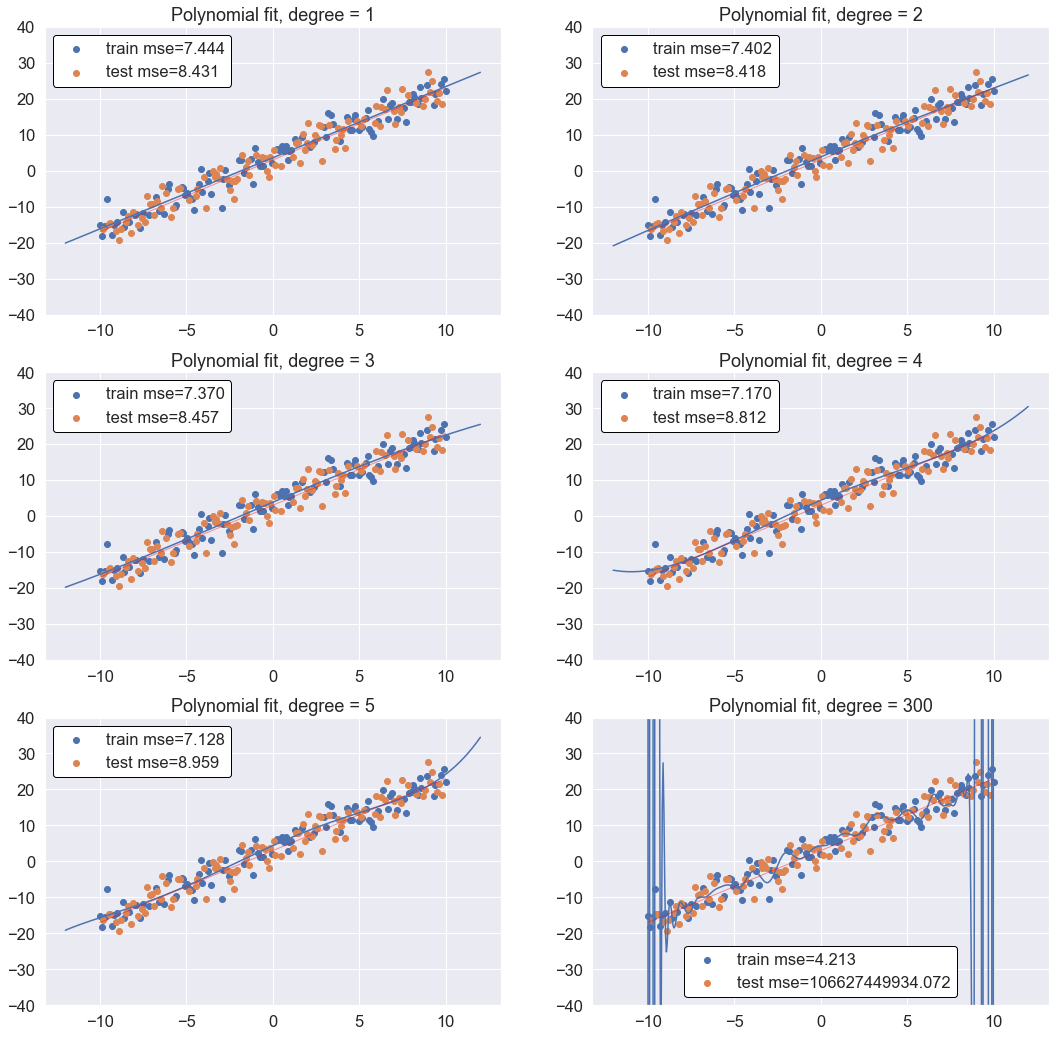

In [3]:
grid = np.linspace(-12, 12, 500)  # для построения графика полиномиальной функции

# создаем поля для графиков
fig, ax = plt.subplots(3, 2, figsize=(18,18))
ax = ax.ravel()   # ??? Return a flattened array

for i, deg in enumerate([1, 2, 3, 4, 5, 300]):
    # обучаем модель
    poly = np.polyfit(X_train, y_train, deg)
    # строим график для полинома i-ой степени и скаттерплоты исходных точек
    ax[i].set_title('Polynomial fit, degree = ' + str(deg))
    ax[i].scatter(X_train,y_train, 
                  label='train mse={:.3f}'.format(mean_squared_error(y_train, np.polyval(poly, X_train))))
    ax[i].scatter(X_test,y_test, 
                  label='test mse={:.3f}'.format(mean_squared_error(y_test, np.polyval(poly, X_test))))
    ax[i].set_ylim(-40, 40)
    ax[i].plot(grid, np.polyval(poly, grid))
    ax[i].plot(X, 2 * X + 3, color='red', lw=1, alpha = 0.4)
    legend_box = ax[i].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
fig.show()

$$||x-y||, \text{x, y - векторы в 2-мерном пространстве}$$
$$||x - y|| = \sqrt{(x_1 - y_1)^2 + (x_2-y_2)^2}$$

$$||x-y||, \text{x, y - векторы в n-мерном пространстве}$$
$$||x - y|| = \sqrt{(x_1 - y_1)^2 + ... + (x_n-y_n)^2}$$

### Идея 1: регуляризация
Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели. Например, обычная версия линейной регрессии выглядит так:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} \rightarrow \min_{w}.$$

Регуляризованная версия:
$$\frac{\sum\limits_{i=1}^{\ell}\left|\left|\langle x^i, w\rangle - y^i\right|\right|^2}{\ell} + \frac{1}{C}\left|\left|w\right|\right|^2\rightarrow \min_{w}.$$

Такая версия линейной регресси называется Ridge-регрессией.  
Есть также Lasso-регрессия и ElasticNet.

Обычная версия логрегрессии:
$$-\frac{1}{\ell}\left( \sum\limits_{y^i = 1}\ln\sigma(\langle x, w\rangle) + \sum\limits_{y^i = -1}\ln(1-\sigma(\langle x, w\rangle))\right)\rightarrow \min_{w}$$

Регуляризованная версия:

$$-\frac{1}{\ell}\left( \sum\limits_{y^i = 1}\ln\sigma(\langle x, w\rangle) + \sum\limits_{y^i = -1}\ln(1-\sigma(\langle x, w\rangle))\right) + \frac{1}{C}||w||^2\rightarrow \min_{w}$$

### Идея 2: кросс-валидация

<img src='https://drive.google.com/uc?id=19TOWCsLwIjNSmcHzu46f6JqY5TEefm9h' width=600/>
Картинка говорит сама за себя. Чтобы получить более стабильное предсказание и точно увидеть переобучение, можно использовать кросс-валидацию. Это ещё пригодится дальше в ноутбуке.

# Pipeline решения ML-задачи

![lifecycle.png](https://drive.google.com/uc?export=view&id=1ZVVA3knTV7M0sTANYF4kOSMAZWG_BB5j)

![pipeline.jpg](https://drive.google.com/uc?export=view&id=1wt86eJI3wDb4SuRKFdtjvqKDaW0UDLvz)

# Выбор оптимальной модели

Теперь мы потренируемся обучению, оценке и валидации моделей, подбору оптимальных гиперпараметров, смешиванию моделей. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

In [16]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ', header=None)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
# списки столбцов по типу содержащихся данных в дальнейшем понадобятся
# пятнадцатая колонка будет колонкой "ответов", поэтому 14 в списках нет
numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

columns = ('''age workclass fnlwgt education educ-num marital-status occupation relationship 
                race sex capital-gain capital-loss  hours-per-week native-country salary''')
df.columns = columns.split() # сделаем список имен колонок и переименуем колонки
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [121]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
educ-num          32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
salary            32561
dtype: int64

In [19]:
df = df.replace('?', np.nan)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
educ-num             0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [20]:
# грубо выбрасываем все строки с нанами, теряя 7,5% выборки
df = df.dropna()
df.count()

age               30162
workclass         30162
fnlwgt            30162
education         30162
educ-num          30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital-gain      30162
capital-loss      30162
hours-per-week    30162
native-country    30162
salary            30162
dtype: int64

In [21]:
# хотим предсказывать 1(True), если зарплата больше 50K, 0(False) иначе.
# заменяем значения в столбце salary желемыми ответом
df['salary'] = df['salary'].apply((lambda x: x=='>50K'))

In [22]:
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


In [99]:
df.describe()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
# разделяем df на два: с числовыми столбцами и категориальными
# используем "маскирование" созданным ранее списком числовых колонок
numeric_data = df[df.columns[numeric_indices]]
categorial_data = df[df.columns[categorical_indices]]

# /юб/ можно было бы и так, вроде
# numeric_data = df.iloc[:, numeric_indices]
# categorial_data = df.iloc[:, categorical_indices]

In [24]:
numeric_data.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [25]:
categorial_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [29]:
df.education.unique(), df.education.nunique()

(array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
        '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object),
 16)

In [26]:
for column in df.columns[[categorical_indices]]:
    print(column, df[column].nunique())

workclass 7
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


### One-hot кодирование
Поскольку все алгоритмы машинного обучения, которые мы изучили, работают лишь с числовыми признаками, необходимо придумать способ обработки категориальных признаков, переводящий их в числовые. 
Одним из способов сделать это является One-hot кодирование. Его суть состоит в следующем. Пусть некоторая категориальная переменная (скажем, color) принимает $n$ различных значений (Red, Yellow, Green). Тогда можно создать $n$ новыx переменныx, соответствующих различным значениям категориального признака, каждая из которых равна 1 в том случае, если изначальный категориальный признак принимает такое значение, и 0 иначе. Принцип работы иллюстрирован на картинке.

<img src='https://drive.google.com/uc?id=17oipPzKv7JFU5Z94hBUzMb5zJJlpbwxj' width=700/>

В Pandas One-hot кодирование выполняется функцией pd.get_dummies. Сгенерируем One-hot признаки для нашего датасета. Сохраним полную матрицу объекты признаки в переменную X.

In [27]:
# делаем one hot encoding над категориальной таблицей
dummy_features = pd.get_dummies(categorial_data)
categorial_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
# объеденяем обратно таблицы с числовыми и one hot encoding данными
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# исходный дф за вычетом последнего ("целевого") столбика
X_origin = df.iloc[:, :-1]
X_origin.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [30]:
# вектор "верных ответов"
y = df['salary']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: salary, dtype: bool

In [31]:
# мы понаделали кучу новых колонок
X.shape, X_origin.shape

((30162, 104), (30162, 14))

In [135]:
# юб
# закончили предварительную обработку данных
# сохраним дфы, чтобы снова не повторять обработку
X.to_csv('X', index=False)
y.to_csv('y', index=False)
X_origin.to_csv('X_origin', index=False)

_____________________________________________________________________________________________________
_____________________________________________________________________________________________________
_____________________________________________________________________________________________________

In [1]:
# продублируем "инициализацию"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

In [2]:
# и считаем наши данные уже из файлов
X = pd.read_csv('X')
y = pd.read_csv('y')
X_origin = pd.read_csv('X_origin')

In [3]:
# юб
X.shape, y.shape, X_origin.shape

((30162, 104), (30162, 1), (30162, 14))

In [3]:
# создаем обучающую (80%) и тестирующую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 104), (6033, 104), (24129, 1), (6033, 1))

Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. Используем идею кросс-валидации.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  # а где он используется?

In [5]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    """отрисовка целевого показателя в зависимости от значения гипермараметра
    """
    '''
    X: df
    y: df
    model: модель sklearn
    grid: array1D
    param_scale: или 'ordinary', или 'log'
    draw: bool. Надо ли отрисовывать или только посчитать means и error
    '''
    parameters = {param_name: grid}
    # словарь под один элемент, т.к. именно словарь надо подать в парметр param_grid GridSearchCV
    
    # объект GridSearchCV для подбора гиперпараметров по сетке при помощи кросс-валидации 
    # на 3 (у авторов было 5) фолда
    # n_jobs=-1 было
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=3,
                            scoring='f1',
                            n_jobs=3, 
                            verbose=10)
    CV_model.fit(X, y)  # обучаемся
    # берем среднее (по фолдам) и стандартную ошибку нашего "скоринга" для нанесения на график
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    # print(CV_model.cv_results_)  # печать данных по обучению-валидации
    
    # рисуем диаграмму, если есть такая метка
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)

        # логарфмируем ординату, если есть такая метка
        if (param_scale == 'log'):
            plt.xscale('log')
        
        # на абсциссе грид нашего гиперпараметра, на ординате - средние нашего скоринга
        plt.plot(grid, means, label='mean values of score', color='red', lw=3)
        # закрашиваем область в +/- 2 значения ошибки вокруг средних
        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='blue', label='filled area between errors', alpha=0.1)
        
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel(param_name)  # у авторов было "parameter"
        plt.ylabel('f1')  # у авторов было "roc_auc"
        plt.show()
        
    return means, error

___________________________________________________________________________________________________

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
# две модели. Один гиперпараметр у одной модели, один у второй.
# В первом случае у авторов было 8(?) значений гиперпараметра, во втором - 29.
# В первом логарифмическая шкала для гиперпараметров, во втором - линейная.
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
# grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]  # авторский вариант
grids = [np.array(np.linspace(1, 21, 11), dtype='int'), np.arange(1, 31)]
param_scales = ['ordinary', 'ordinary']  # у авторов первый был 'log'

Fitting 3 folds for each of 11 candidates, totalling 33 fits


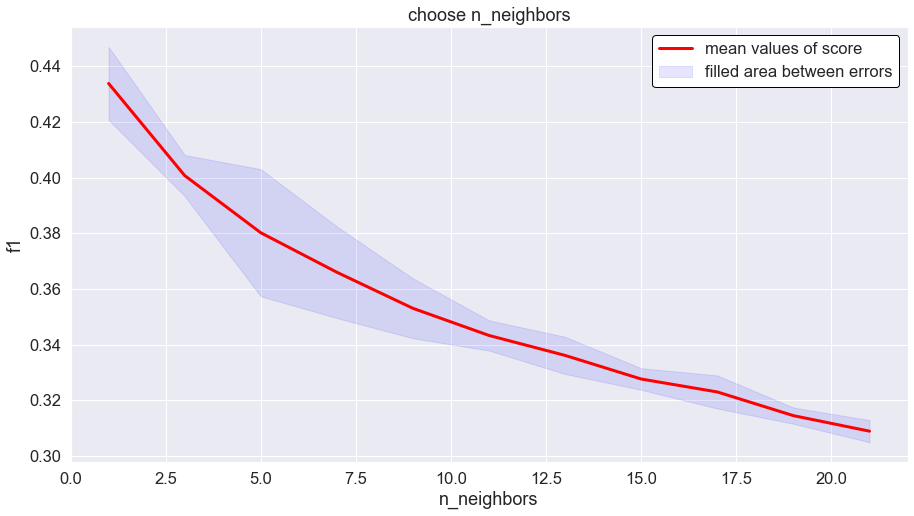

Fitting 3 folds for each of 30 candidates, totalling 90 fits


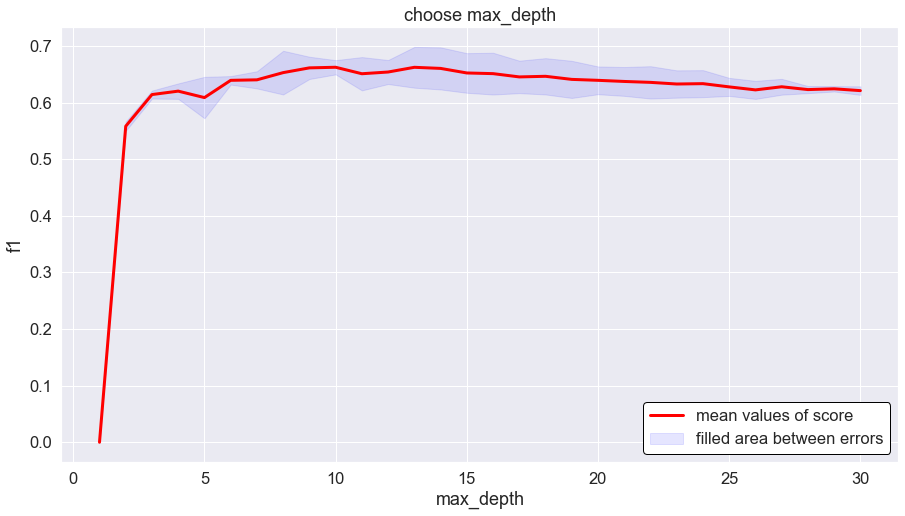

In [11]:
# для каждой модели свой изменяемый параметр, своя сетка для него и тип шкалы
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search_and_draw(X_train, np.ravel(y_train), model, param_name, grid, param_scale)

/юб/
Лучше всего по одному соседу cработал KNN  
Глубина дерева больше ~10 не дает прироста

grids = [np.array(np.linspace(1, 21, 11), dtype='int'), np.arange(1, 31)]  
раб ПК гвв - ~20сек - Ryzen 5 3350G  
дом ПК - 50с - AMD A8-7600  
GCollab (дом) - 101с  
Надо сравнить на довольно длительном обучении без построения графиков?

______________________________________________________________________________________________________

Подберём параметр n_estimators в алгоритме случайный лес. Известно, что случайный лес не переобучается. Поэтому график качества будет монотонно возрастать. Следовательно, необходимо найти минимальное значение n_estimators, при котором качество не изменяется. 
Поскольку каждое дерево обучается независимо от остальных, достаточно обучить сразу лес из большого количества деревьев, а затем рассмотреть подмножества нужного размера из исходного множества деревьев.

In [12]:
# продублируем "инициализацию"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

In [50]:
# и считаем наши данные уже из файлов
X = pd.read_csv('X')
y = pd.read_csv('y')
X_origin = pd.read_csv('X_origin')

In [51]:
# создаем обучающую (80%) и тестирующую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm  # покажет процесс исполения на "барах"

In [9]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)
# объект, который будет использоваться для разделения на фолды? 
# Выдает "списки" индексов соотвтетствующих элементов

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []
    
    # берем очередную пару выборок: тренировочную и валидационную
    X_train_kf = X_train[train_indices]
    y_train_kf = np.ravel(y_train[train_indices])
    # столбик превращаем в строку, а то потом forest.fit ругается (хотя и выполняется)
    X_val_kf = X_train[val_indices]
    y_val_kf = np.ravel(y_train[val_indices])
    
    # обучаем 100 деревьев
    forest = RandomForestClassifier(n_estimators=max_trees, n_jobs=-1)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_
    
    # рассчитываем метрику для 1 дерева, 2 совместно работающих деревьев, для 3 и т.д.
    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees, n_jobs=-1)
        # в оригинале n_jobs не было. Загружалось только одно ядро, похоже
        
        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))
    
    # запоминаем оценки для всех вариантов в массив
    scores = np.array(scores)
    
    # и складываем в один общий список
    global_scores.append(scores)
    
# сливаем накопленные массивы в единный массив 2D
global_scores = np.stack(global_scores, axis=0)

In [10]:
# юб
global_scores[:, :5]

array([[0.73089391, 0.79023906, 0.82453541, 0.84024326, 0.85043583],
       [0.73270502, 0.796765  , 0.82986039, 0.84851811, 0.85834471],
       [0.73540663, 0.79924976, 0.82899652, 0.845914  , 0.85687633],
       [0.72146222, 0.78934861, 0.81726137, 0.83514667, 0.8448337 ],
       [0.72670933, 0.79638062, 0.82391696, 0.83939702, 0.85150481]])

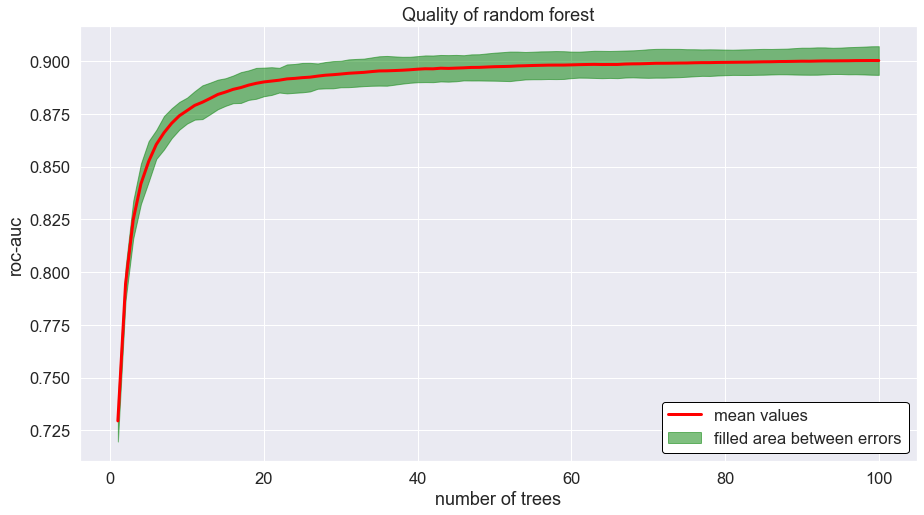

In [11]:
mean_cross_val_score = global_scores.mean(axis=0)  # средние для 100 лесов по 5 фолдам
# а так честно - взять среднее из обучений на разных фолдах? А не сделать некое одно дерево после 5 обучений?
# и моделей у нас нечетное количество, что плохо для голосования, наверное.
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values, 
                 mean_cross_val_score - 2 * std_cross_val_score, 
                 mean_cross_val_score + 2 * std_cross_val_score, 
                 color='green', 
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [15]:
# юб
mean_cross_val_score[::2] - mean_cross_val_score[1::2]

array([-6.49611867e-02, -1.69296793e-02, -8.11803012e-03, -4.50633372e-03,
       -2.44603919e-03, -1.49893152e-03, -1.88398558e-03, -1.28092696e-03,
       -1.14094044e-03, -6.57000040e-04, -4.17597972e-04, -2.40967350e-04,
       -2.25275080e-04, -4.27530469e-04, -3.07227943e-04, -2.19901926e-04,
       -3.63007201e-04, -5.53049993e-05, -1.51337688e-04, -2.76848522e-04,
        3.67793552e-05,  8.74822760e-05, -1.32970732e-04, -3.27986599e-05,
       -1.52848692e-04, -9.13269894e-05, -9.32959947e-05, -8.13363622e-05,
       -2.38138824e-05, -9.59953716e-05, -7.33239435e-05,  7.35293522e-05,
        5.15887804e-07, -8.92671596e-05, -1.10900668e-04, -1.42410646e-05,
       -5.95485243e-05, -1.01449878e-04, -4.57950324e-06, -4.03332752e-05,
       -4.36888440e-05, -7.95266793e-05, -3.37770802e-05, -2.87235775e-05,
       -7.43156007e-05, -9.30846650e-05,  5.25702335e-06, -2.44557993e-05,
       -1.61226406e-05,  1.59528195e-05])

### Нормировка признаков

Почему так плохо получилось у KNN? Мы не нормировали данные! Нормируем признаки и проделаем тот же эксперимент с алгоритмом ближайших соседей. Посмотрим, изменилось ли качество предсказания.

In [16]:
# продублируем "инициализацию"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

In [17]:
# и считаем наши данные уже из файлов
X = pd.read_csv('X')
y = pd.read_csv('y')
X_origin = pd.read_csv('X_origin')

In [18]:
# создаем обучающую (80%) и тестирующую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  # а где он используется?

In [21]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    """отрисовка целевого показателя в зависимости от значения гипермараметра
    """
    '''
    X: df
    y: df
    model: модель sklearn
    grid: array1D
    param_scale: или 'ordinary', или 'log'
    draw: bool. Надо ли отрисовывать или только посчитать means и error
    '''
    parameters = {param_name: grid}
    # словарь под один элемент, т.к. именно словарь надо подать в парметр param_grid GridSearchCV
    
    # объект GridSearchCV для подбора гиперпараметров по сетке при помощи кросс-валидации 
    # на 3 (у авторов было 5) фолда
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=3,
                            scoring='f1',
                            n_jobs=-1, 
                            verbose=10)
    CV_model.fit(X, y)  # обучаемся
    # берем среднее (по фолдам) и стандартную ошибку нашего "скоринга" для нанесения на график
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    # print(CV_model.cv_results_)  # печать данных по обучению-валидации
    
    # рисуем диаграмму, если есть такая метка
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)

        # логарфмируем ординату, если есть такая метка
        if (param_scale == 'log'):
            plt.xscale('log')
        
        # на абсциссе грид нашего гиперпараметра, на ординате - средние нашего скоринга
        plt.plot(grid, means, label='mean values of score', color='red', lw=3)
        # закрашиваем область в +/- 2 значения ошибки вокруг средних
        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='blue', label='filled area between errors', alpha=0.1)
        
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel(param_name)  # у авторов было "parameter"
        plt.ylabel('f1')  # у авторов было "roc_auc"
        plt.show()
        
    return means, error

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
# обучаем StandardScaler только на тестовых данных, не допуская утечки тестовых данных в модель
X_test_scaled = scaler.transform(X_test)

`StandardScaler` выполняет преобразование $$z = \frac{x - \mu}{\sigma}, \text{где $\sigma$ - стандартное отклонение, а  $\mu$ - среднее}$$

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:  5.9min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


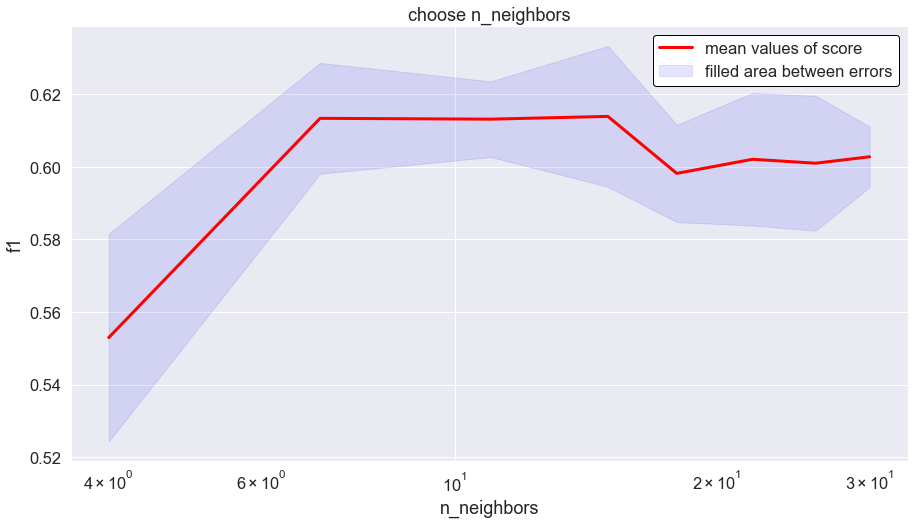

In [23]:
search_and_draw(X_train_scaled, y_train, KNeighborsClassifier(n_jobs=-1), 'n_neighbors', 
                np.array(np.linspace(4, 30, 8), dtype='int'), 'log');

Как и следовало ожидать, ни один из наших алгоритмов не побил случайный лес. Итак, видим, что на больших выборках бэггинг работает. Вычислим итоговое качество на test.

In [24]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

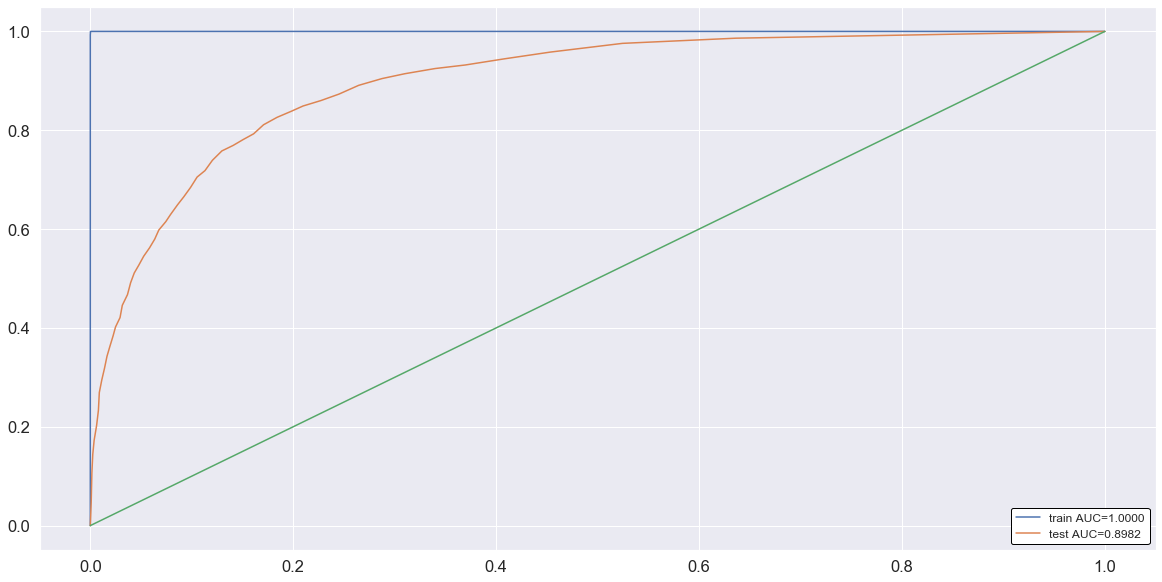

In [26]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

## Что ещё можно делать:

Мы подбирали оптимальный одномерный параметр для алгоритма. Можно также:

* Искать по сетке не только численные гиперпараметры, но и категориальные, например, метрику в алгоритме ближайших соседей или критерий ветвления в решающем дереве.

* Искать оптимальный параметр по многомерной сетке. Перебрать все возможные варианты здесь не выйдет, потому что на это уйдёт слишком много времени. Зато можно перебирать случайные точки по сетке. Эта процедура называется Grid Random Search.

# Стекинг

Идея стекинга состоит в том, чтобы обучать разнообразные алгоритмы и использовать их в качестве новых признаков объектов. 

Чтобы избежать переобучения, необходимо разделить обучающую выборку на n фолдов. Для предсказания ответов на k-ом фолде алгоритм обучается на оставшихся n-1 фолдах и предсказывает ответ на k-ом фолде. Такую схему обучения-предсказания реализует функция sklearn.model_selection.cross_val_predict.

In [ ]:
# юб
# Повторим некоторые импорты и действия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
%matplotlib inline

In [38]:
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
X = pd.read_csv('X')
y = pd.read_csv('y')
X_origin = pd.read_csv('X_origin')
# в предыдущем  блоке сработало. А здесь почему-то нет.Где-то у меня ошибка в размерности данных?

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [196]:
# юб
X.dtypes

age                               int64
fnlwgt                            int64
educ-num                          int64
capital-gain                      int64
capital-loss                      int64
                                  ...  
native-country_Thailand           int64
native-country_Trinadad&Tobago    int64
native-country_United-States      int64
native-country_Vietnam            int64
native-country_Yugoslavia         int64
Length: 104, dtype: object

_____________

In [4]:
from sklearn.model_selection import cross_val_predict

Будем работать с тем же самым датасетом, что и ранее. Посмотрим, сумеем ли мы побить результаты случайного леса с помощью стекинга.

In [5]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
        # что мы возвращаем? предсказания через cv для тренировочной выборки 
        # и предсказания для тестовой? И это называем метафичи
    # обрабатываем случай, когда у нашей модели нет метода predict_proba, а только predict
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
#  модели, которые мы будем использовать складываем в список
models = []
models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=30))
models.append(LogisticRegression())
models.append(RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1))
models.append(RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1))
models.append(DecisionTreeClassifier(max_depth=8))

In [10]:
meta_features_train = np.zeros((X_train.shape[0], 0))
# что здесь происходит? Создаем пустой (раз его ширина - 0) массив
meta_features_test = np.zeros((X_test.shape[0], 0))

In [11]:
# юб
meta_features_train

array([], shape=(24129, 0), dtype=float64)

In [34]:
# тренируем все модели и коллекционируем полученные предсказания?
for model in tqdm(models):
    train, test = compute_meta_feature(model, X_train, X_test, y_train, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

In [43]:
# юб
meta_features_train, meta_features_test

(array([[0.26666667, 0.17717501, 0.36741905, 0.29153534, 0.16714697],
        [0.1       , 0.24720743, 0.42511813, 0.45662111, 0.47945205],
        [0.16666667, 0.25210897, 0.30255907, 0.35569193, 0.13839891],
        ...,
        [0.26666667, 0.09565555, 0.38927236, 0.3432499 , 0.4299881 ],
        [0.13333333, 0.32686432, 0.26277338, 0.25405289, 0.11594203],
        [0.26666667, 0.23418469, 0.41623439, 0.54328092, 0.70873168]]),
 array([[0.23333333, 0.28157077, 0.23789024, 0.23301728, 0.04733728],
        [0.26666667, 0.2224772 , 0.3021888 , 0.31381997, 0.38503708],
        [0.26666667, 0.140318  , 0.32214378, 0.30447628, 0.38503708],
        ...,
        [0.3       , 0.10334978, 0.42440395, 0.64618761, 0.72564735],
        [0.06666667, 0.29878892, 0.30711129, 0.32835937, 0.38503708],
        [0.1       , 0.20463855, 0.30654603, 0.30994559, 0.34294872]]))

In [44]:
# стекинг: в логистическую регрессию грузим предсказания наших моделей
stacking_model = LogisticRegression()
stacking_model.fit(meta_features_train, y_train)

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted = stacking_model.predict_proba(meta_features_test)[:, 1]

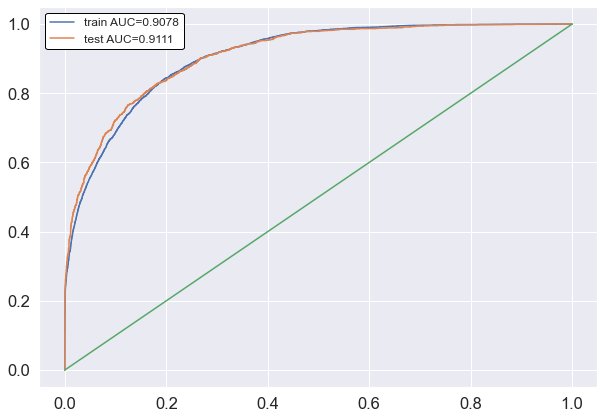

In [45]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Бустинг

Попробуем в пару-тройку строк побить всё то качество, которое мы так усердно искали.

In [47]:
# если этого модуля нет, то нужно раскомментировать следующую строчку и запустить
# !pip install xgboost

In [48]:
import xgboost

In [49]:
boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

[12:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


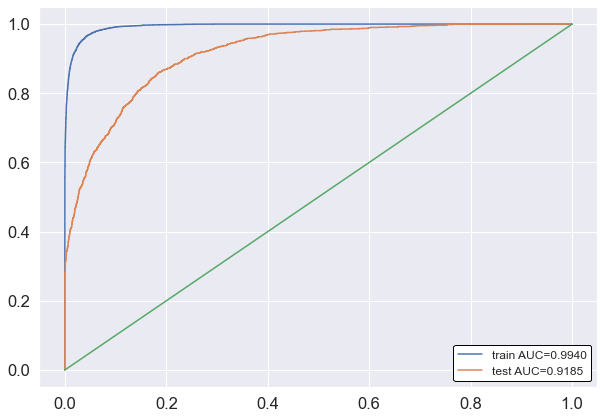

In [50]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Круто, да? А теперь попробуем "отечественного" производителя - CatBoost от Яндекса.

In [52]:
# если этого модуля нет, то нужно раскомментировать следующую строчку и запустить
# !pip install catboost

In [53]:
import catboost # документация: https://catboost.ai/docs

In [54]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

![docs_one_hot.png](https://drive.google.com/uc?export=view&id=119U7_cTX8imN13rr3Bi-vevHjo7kEXr6)

(из документации CatBoost)

In [56]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.175482
0:	learn: 0.5555568	total: 45.5ms	remaining: 9.05s
1:	learn: 0.4610674	total: 104ms	remaining: 10.3s
2:	learn: 0.4140298	total: 157ms	remaining: 10.3s
3:	learn: 0.3796229	total: 214ms	remaining: 10.5s
4:	learn: 0.3583849	total: 277ms	remaining: 10.8s
5:	learn: 0.3490510	total: 327ms	remaining: 10.6s
6:	learn: 0.3421640	total: 379ms	remaining: 10.5s
7:	learn: 0.3359141	total: 446ms	remaining: 10.7s
8:	learn: 0.3298750	total: 494ms	remaining: 10.5s
9:	learn: 0.3242243	total: 549ms	remaining: 10.4s
10:	learn: 0.3194521	total: 603ms	remaining: 10.4s
11:	learn: 0.3158933	total: 658ms	remaining: 10.3s
12:	learn: 0.3134296	total: 720ms	remaining: 10.4s
13:	learn: 0.3116253	total: 775ms	remaining: 10.3s
14:	learn: 0.3101914	total: 827ms	remaining: 10.2s
15:	learn: 0.3075786	total: 882ms	remaining: 10.1s
16:	learn: 0.3060812	total: 932ms	remaining: 10s
17:	learn: 0.3047731	total: 992ms	remaining: 10s
18:	learn: 0.3036083	total: 1.04s	remaining: 9.96s
19:	learn: 0.3

161:	learn: 0.2557592	total: 9.27s	remaining: 2.17s
162:	learn: 0.2555982	total: 9.32s	remaining: 2.12s
163:	learn: 0.2554302	total: 9.37s	remaining: 2.06s
164:	learn: 0.2553415	total: 9.43s	remaining: 2s
165:	learn: 0.2552145	total: 9.49s	remaining: 1.94s
166:	learn: 0.2548917	total: 9.54s	remaining: 1.88s
167:	learn: 0.2548192	total: 9.59s	remaining: 1.83s
168:	learn: 0.2546379	total: 9.65s	remaining: 1.77s
169:	learn: 0.2544981	total: 9.71s	remaining: 1.71s
170:	learn: 0.2544450	total: 9.77s	remaining: 1.66s
171:	learn: 0.2542883	total: 9.83s	remaining: 1.6s
172:	learn: 0.2541153	total: 9.89s	remaining: 1.54s
173:	learn: 0.2537970	total: 9.95s	remaining: 1.49s
174:	learn: 0.2536370	total: 10s	remaining: 1.43s
175:	learn: 0.2535085	total: 10.1s	remaining: 1.37s
176:	learn: 0.2533375	total: 10.1s	remaining: 1.31s
177:	learn: 0.2532304	total: 10.2s	remaining: 1.26s
178:	learn: 0.2530151	total: 10.2s	remaining: 1.2s
179:	learn: 0.2528507	total: 10.3s	remaining: 1.14s
180:	learn: 0.25260

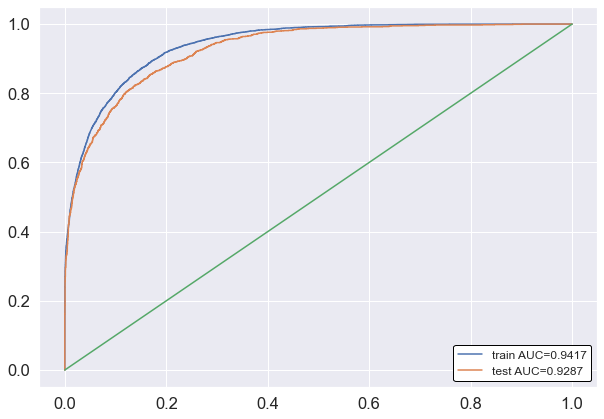

In [57]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [58]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.9114395333
bestIteration = 195

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9114395	best: 0.9114395 (0)	total: 9.63s	remaining: 3m 2s

bestTest = 0.9097740158
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9097740	best: 0.9114395 (0)	total: 19.8s	remaining: 2m 58s

bestTest = 0.9091507027
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.9091507	best: 0.9114395 (0)	total: 30.4s	remaining: 2m 52s

bestTest = 0.9103659149
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.9103659	best: 0.9114395 (0)	total: 41.2s	remaining: 2m 44s



{'params': {'l2_leaf_reg': 0.0},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,

**удалить!!!**

In [2]:
v1 = [1, 2, 3]
v2 = [10, 20, 30]

In [3]:
[ai * bi for ai, bi in zip(v1, v2)]

[10, 40, 90]

In [9]:
list(map(lambda i: i[0] * i[1], zip(v1, v2)))

[10, 40, 90]

In [36]:
global_scores = []
scores = []

In [37]:
scores.append(np.random.rand(5))
scores

[array([0.89213191, 0.21297169, 0.7663549 , 0.75342062, 0.21958921])]

In [38]:
global_scores.append(scores)
global_scores

[[array([0.89213191, 0.21297169, 0.7663549 , 0.75342062, 0.21958921])]]

In [39]:
global_scores = np.stack(global_scores, axis=0)
global_scores

array([[[0.89213191, 0.21297169, 0.7663549 , 0.75342062, 0.21958921]]])

In [40]:
global_scores.shape

(1, 1, 5)

In [42]:
np.zeros((3, 0))

array([], shape=(3, 0), dtype=float64)